In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YirpBz2JeIQ10LKmg8jW")
project = rf.workspace("titulacin").project("person-detection-9a6mk")
version = project.version(16)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Person-detection-16 in yolov8:: 100%|██████████| 10978/10978 [00:03<00:00, 3127.66it/s]


In [ ]:

import os

dataset_path = dataset.location  
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:  
        print(f"{subindent}{f}")


Person-detection-16/
    README.dataset.txt
    README.roboflow.txt
    data.yaml
    test/
        labels/
            premium_photo-1661484857459-7256e961205d_jpg.rf.aa543481948b8207eea51c7f7b46471d.txt
            premium_photo-1661483376273-ebce3f96a557_jpg.rf.97ce81f3227de3097209985d1a8b0510.txt
            premium_photo-1661430807726-7f3aca78277a_jpg.rf.f2054612302c3645a3bd3bff77871ea1.txt
            premium_photo-1661292128559-ec5206d3a05a_jpg.rf.1bd2bae0c61320527a41389ea21e225a.txt
            photo-1634985492349-8589a9255cbe_jpg.rf.4f36728b2a976d7e05846712482d7c2f.txt
        images/
            premium_photo-1661483376273-ebce3f96a557_jpg.rf.97ce81f3227de3097209985d1a8b0510.jpg
            photo-1634985492349-8589a9255cbe_jpg.rf.4f36728b2a976d7e05846712482d7c2f.jpg
            premium_photo-1661292128559-ec5206d3a05a_jpg.rf.1bd2bae0c61320527a41389ea21e225a.jpg
            premium_photo-1661430807726-7f3aca78277a_jpg.rf.f2054612302c3645a3bd3bff77871ea1.jpg
            premium

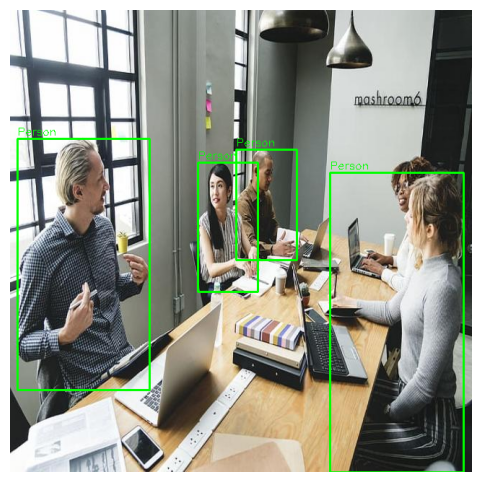

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_yolo_label(img_path):
    label_path = img_path.replace("images", "labels").replace(".jpg", ".txt").replace(".png", ".txt")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    if not os.path.exists(label_path):
        print(f"No label found for {img_path}")
        return

    with open(label_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, box_w, box_h = map(float, line.strip().split())
            x1 = int((x_center - box_w / 2) * w)
            y1 = int((y_center - box_h / 2) * h)
            x2 = int((x_center + box_w / 2) * w)
            y2 = int((y_center + box_h / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"Person", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

train_img_dir = os.path.join(dataset_path, "train/images")
img_files = [f for f in os.listdir(train_img_dir) if f.endswith(('.jpg', '.png'))]

if img_files:
    show_yolo_label(os.path.join(train_img_dir, img_files[0]))
else:
    print("No image files found in train/images")


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt")  

model.train(
    data=f"{dataset.location}/data.yaml",  
    epochs=30,         
    imgsz=640,         
    batch=16,          
    name="yolov8n_person",
    project="runs/train",
)


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Person-detection-16/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=yolov8n_person2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 274MB/s]


AMP: checks passed ✅


train: Scanning /content/Person-detection-16/train/labels... 4407 images, 69 backgrounds, 0 corrupt: 100%|██████████| 4407/4407 [00:01<00:00, 2305.29it/s]


train: New cache created: /content/Person-detection-16/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Person-detection-16/valid/labels... 1071 images, 44 backgrounds, 0 corrupt: 100%|██████████| 1071/1071 [00:01<00:00, 889.29it/s]

val: New cache created: /content/Person-detection-16/valid/labels.cache


Plotting labels to runs/train/yolov8n_person2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/yolov8n_person2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       2.3G      1.492      2.053      1.511         37        640: 100%|██████████| 276/276 [01:25<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.16it/s]


                   all       1071       2293      0.486        0.5      0.456      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.81G      1.688      1.969      1.682         29        640: 100%|██████████| 276/276 [01:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.47it/s]


                   all       1071       2293      0.487      0.387      0.374      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.82G      1.735      1.994      1.714         21        640: 100%|██████████| 276/276 [01:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]

                   all       1071       2293      0.409       0.39      0.368       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.84G      1.707       1.91        1.7         50        640: 100%|██████████| 276/276 [01:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]


                   all       1071       2293      0.479      0.432       0.42      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.86G      1.637      1.816      1.656         28        640: 100%|██████████| 276/276 [01:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.49it/s]


                   all       1071       2293      0.653      0.538      0.583      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.87G      1.587      1.726      1.606         28        640: 100%|██████████| 276/276 [01:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]


                   all       1071       2293      0.666      0.567      0.626      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.89G      1.542      1.647      1.583         18        640: 100%|██████████| 276/276 [01:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.48it/s]


                   all       1071       2293      0.674      0.498      0.569      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       2.9G      1.513       1.61      1.563         29        640: 100%|██████████| 276/276 [01:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]

                   all       1071       2293       0.73      0.612      0.681      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.92G      1.455      1.546      1.522         22        640: 100%|██████████| 276/276 [01:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]


                   all       1071       2293      0.659      0.609       0.65      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.94G      1.467      1.504      1.512         15        640: 100%|██████████| 276/276 [01:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.44it/s]


                   all       1071       2293      0.662      0.569      0.596      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.96G      1.423      1.469      1.493         19        640: 100%|██████████| 276/276 [01:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.39it/s]

                   all       1071       2293      0.763      0.598      0.693      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.97G      1.405      1.424      1.465         31        640: 100%|██████████| 276/276 [01:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]


                   all       1071       2293      0.686      0.633      0.681      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.99G      1.381      1.393      1.455         31        640: 100%|██████████| 276/276 [01:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]

                   all       1071       2293      0.795      0.617      0.716      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.01G      1.373      1.369      1.444         19        640: 100%|██████████| 276/276 [01:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.53it/s]

                   all       1071       2293      0.748      0.647      0.722      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.02G      1.349       1.33      1.428         30        640: 100%|██████████| 276/276 [01:21<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]

                   all       1071       2293      0.755      0.658      0.738      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.04G      1.328      1.291      1.401         40        640: 100%|██████████| 276/276 [01:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.42it/s]


                   all       1071       2293      0.758      0.643      0.728      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.06G      1.295      1.264      1.388         18        640: 100%|██████████| 276/276 [01:20<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.26it/s]

                   all       1071       2293      0.772      0.656      0.745      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.07G      1.309      1.234      1.385         29        640: 100%|██████████| 276/276 [01:22<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]


                   all       1071       2293      0.776      0.674      0.756      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.09G      1.273      1.215      1.372         56        640: 100%|██████████| 276/276 [01:22<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]


                   all       1071       2293      0.792      0.684      0.774      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.11G      1.254      1.184      1.362         16        640: 100%|██████████| 276/276 [01:21<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]


                   all       1071       2293      0.766      0.664      0.751      0.459
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.13G      1.237      1.068      1.348          9        640: 100%|██████████| 276/276 [01:19<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.29it/s]


                   all       1071       2293      0.787      0.686      0.769      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.14G      1.206      1.026      1.327         20        640: 100%|██████████| 276/276 [01:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.39it/s]

                   all       1071       2293      0.808      0.665      0.767      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.16G       1.19     0.9923      1.318         20        640: 100%|██████████| 276/276 [01:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.53it/s]

                   all       1071       2293      0.816      0.679      0.772      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.18G      1.173     0.9576      1.309         16        640: 100%|██████████| 276/276 [01:16<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]


                   all       1071       2293      0.796        0.7      0.783      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.19G      1.142     0.9335       1.28         15        640: 100%|██████████| 276/276 [01:16<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.41it/s]


                   all       1071       2293      0.814      0.692      0.792      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.21G      1.114     0.9022      1.266         18        640: 100%|██████████| 276/276 [01:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.42it/s]


                   all       1071       2293      0.815      0.706      0.795      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.23G       1.11     0.8805      1.262         23        640: 100%|██████████| 276/276 [01:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]

                   all       1071       2293      0.827      0.698      0.796       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.25G      1.077     0.8489      1.241         11        640: 100%|██████████| 276/276 [01:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.40it/s]

                   all       1071       2293      0.827       0.71      0.806      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.26G      1.064     0.8362      1.229         15        640: 100%|██████████| 276/276 [01:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.42it/s]

                   all       1071       2293      0.811      0.715      0.802      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.28G      1.041     0.7995      1.216         20        640: 100%|██████████| 276/276 [01:16<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.31it/s]

                   all       1071       2293      0.814      0.722      0.809      0.524



30 epochs completed in 0.750 hours.
Optimizer stripped from runs/train/yolov8n_person2/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/yolov8n_person2/weights/best.pt, 6.2MB

Validating runs/train/yolov8n_person2/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.72it/s]


                   all       1071       2293      0.817      0.721      0.809      0.524
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/train/yolov8n_person2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd8c9107810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model.export(format="onnx")


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/train/yolov8n_person2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 218.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 335.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 225.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 209.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 223.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command 

'runs/train/yolov8n_person2/weights/best.onnx'

In [ ]:
model.val()


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Person-detection-16/valid/labels.cache... 1071 images, 44 backgrounds, 0 corrupt: 100%|██████████| 1071/1071 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:13<00:00,  5.12it/s]


                   all       1071       2293      0.806      0.729      0.809      0.524
Speed: 0.8ms preprocess, 4.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/train/yolov8n_person22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd8c5e1f510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!zip -r /content/yolov8n_person.zip /content


Streaming output truncated to the last 5000 lines.
  adding: content/Person-detection-16/train/labels/photo-1533131710569-39bb083d3b8e_jpg.rf.9645ecf72e2b2fdec60f56f0fbf3d0c6.txt (deflated 15%)
  adding: content/Person-detection-16/train/labels/photo-1579295560051-3df968edb036_jpg.rf.a3cc2fa543b5533cd07d4440ba00c5e9.txt (deflated 21%)
  adding: content/Person-detection-16/train/labels/photo-1529565368178-0451d94fcad6_jpg.rf.0a4b4980d97d072647ef2826dcfc1079.txt (deflated 21%)
  adding: content/Person-detection-16/train/labels/photo-1522632586215-659ba5dbab5a_jpg.rf.2f3517fd4ec568267f89764095198714.txt (deflated 26%)
  adding: content/Person-detection-16/train/labels/photo-1487613647282-7bd9d161e688_jpg.rf.28ae9399c086f86917f1bc386fe22eeb.txt (deflated 15%)
  adding: content/Person-detection-16/train/labels/photo-1633987035479-08ca2e1f7b52_jpg.rf.d30c92f54a4757e34ba63972b1ff818f.txt (deflated 18%)
  adding: content/Person-detection-16/train/labels/photo-1521504018422-a60fb399b4c0_jpg.rf.


image 1/1 C:\Users\namit\Desktop\CODE\Road_assistant_new\Pedestrian_detection\custom\pedestrian 1.jpeg: 448x640 5 Personas, 44.6ms
Speed: 2.1ms preprocess, 44.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict11


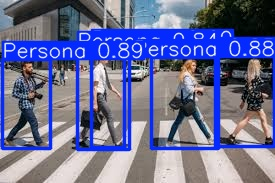

In [ ]:

from ultralytics import YOLO
import os

model = YOLO("C:/Users/namit/Desktop/CODE/Road_assistant_new/Pedestrian_detection/yolov8n_person/content/runs/train/yolov8n_person2/weights/best.pt")


results = model.predict(
    source="C:/Users/namit/Desktop/CODE/Road_assistant_new/Pedestrian_detection/custom/pedestrian 1.jpeg",  # single image or folder
    conf=0.5,     
    save=True,     
    imgsz=640,     
    show=False     
)


from IPython.display import Image, display
output_dir = model.predictor.save_dir
example_img = os.path.join(output_dir, os.listdir(output_dir)[0])
display(Image(filename=example_img))
